### Lets start with a basic classification project for now which we will solve using Logistic regression 

`*CLASSIFICATION*` - It is a Supervised learning approach used to predict the class of the dataset based on the independent input variable using algorithms. ( where Class can be a categorical or discrete values)
                                    
                                    OR
                                    
It is a supervised learning task in which the output variables(Y) to be predicted are discrete values referred to as class labels.

`*Logistic Regression*` -  is a statistical model used to analyze and predict binary outcomes.

- In Logistic regression, instead of fitting a regression (straight) line, we fit an "S" shaped line (sigmoid) logistic          function, which predicts two maximum values (0 or 1). [ takes equation in line format and converts to binary by using sigmoid { where threshold is selected like 0.5 above it the datapoint will be in one and below it in another class} hence in the name we use Regression {line} ]

- it takes values from + infinity to - infinity. However, produces the output between 0 to 1.


Note: Logistic regression uses the concept of predictive modeling as regression; therefore,
    it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.
    
    

- When to use --> If the target has only binary outcome variables. { we can use it for multiclass target variable too but the accuracy will be low }

- How to check for the accuracy --> accuracy, confusion martix





In [37]:
# lets start

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # to ignore the warings we may get due to version issues or not updated packages


In [38]:
os.getcwd()

'C:\\Users\\SWATI\\Downloads\\machine learning'

In [5]:
os.chdir('C:\\Users\SWATI\Downloads\machine learning')

In [39]:
#checking the path for the available files their
os.listdir()

['.ipynb_checkpoints',
 '20-08_Linear Regression Handson (1).ipynb',
 '26-08_Logistic Regression Handson (1).ipynb',
 'bank-additional-full-1 (2).csv',
 'Decision_Tree_case_study=Harsh.ipynb',
 'Decision_Tree_case_study_(5)_(1)_(1).ipynb',
 'heart-1.csv',
 'new_insurance_data.csv']

In [54]:
Bank = pd.read_csv("bank-additional-full-1 (2).csv", sep =';') 

# we use sep parameter as the separator here is not comma (,)

It contains information related to direct marketing campaigns conducted by a Portuguese banking institution.

The goal of using this dataset is often to build a predictive model that can accurately predict whether a client will subscribe to a term deposit based on the available attributes.

In [55]:
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
Bank['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

In [57]:
Bank['y'].unique() # to get all the unique values (here present in Y cols) nunique() to get the count of unique values here 2

array(['no', 'yes', nan], dtype=object)

In [58]:
Bank.shape

(41199, 21)

In [59]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [60]:
Bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [61]:
Bank.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

#### since their are less values here we try to drop the rows and see how it works However, we can use fillna but will have to first convert all the object datatype to integer to be able to use the fillna function

In [62]:
# for now we are trying by dropping the null values 

Bank.dropna(inplace = True)

In [63]:
Bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### we can also use z_score for removing outliers

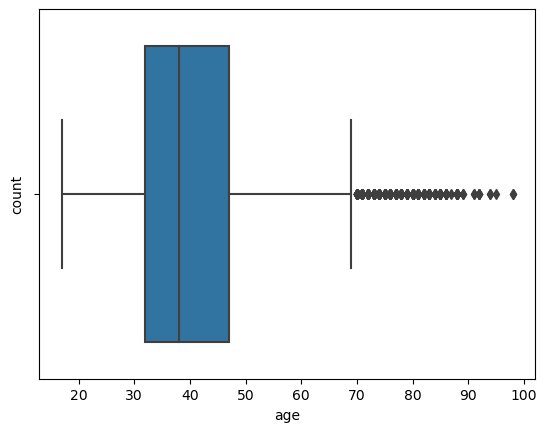

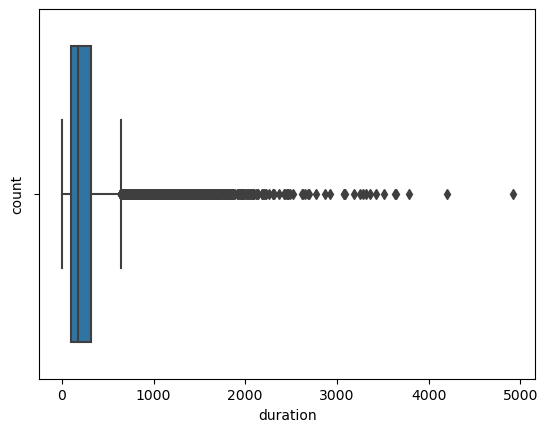

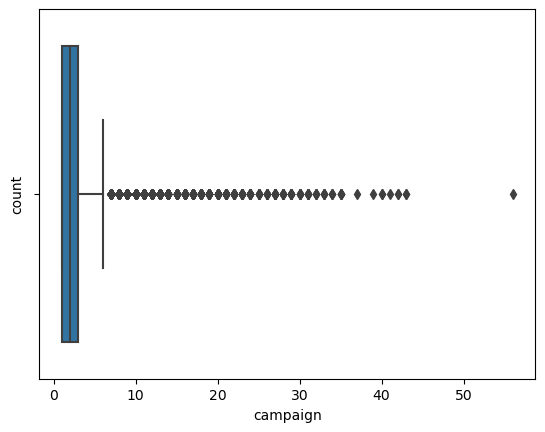

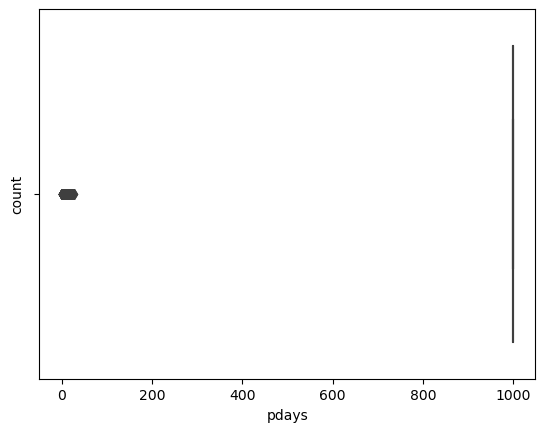

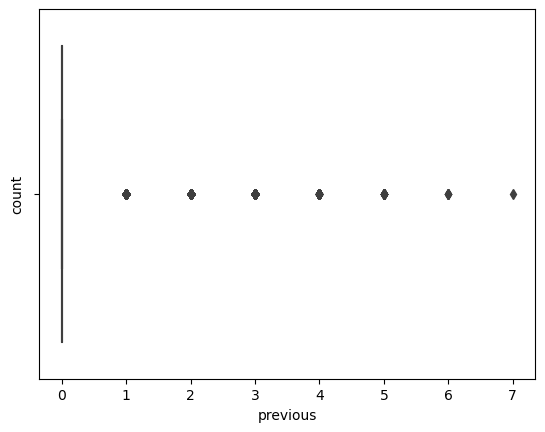

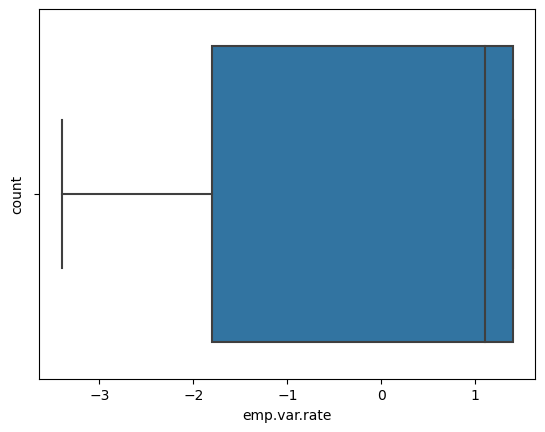

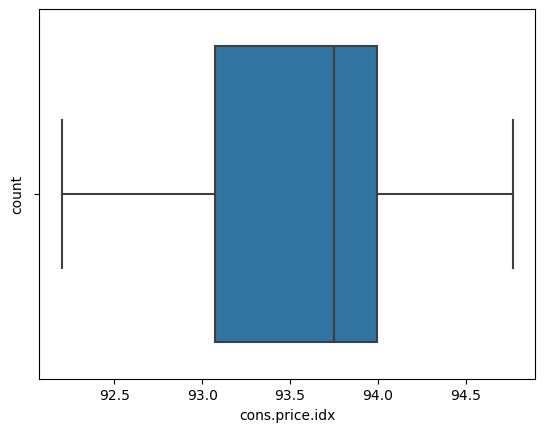

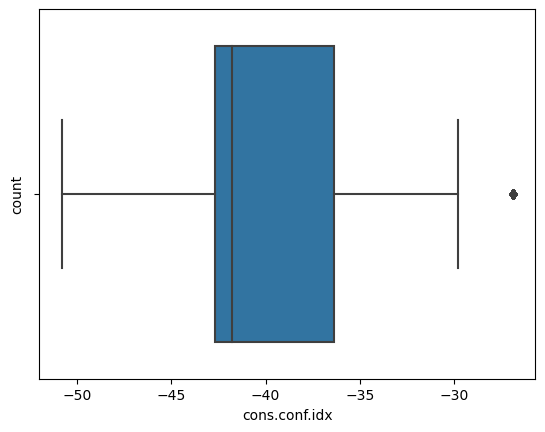

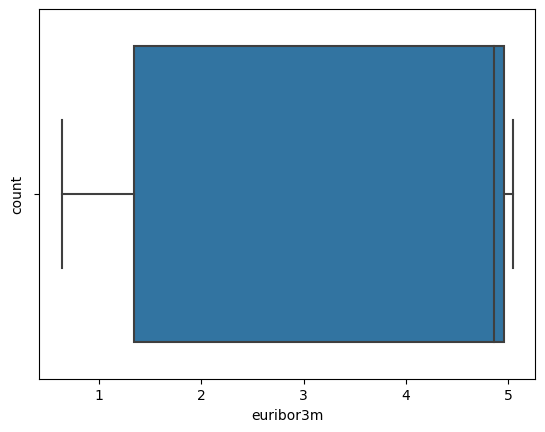

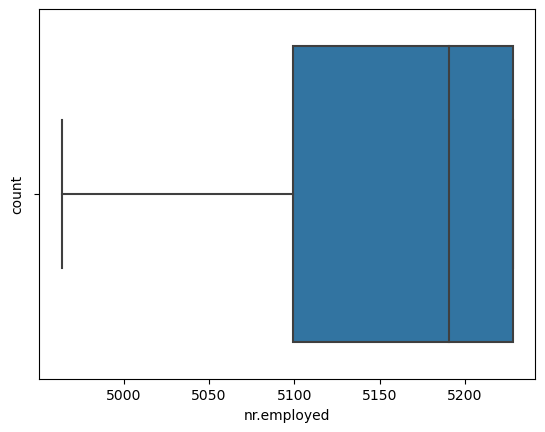

In [64]:
# so we have removed the null values.

# Now, lets check distribution of the features 

# Do remember we can only plot a graph for numerical values

for j in Bank.columns:
    if((Bank[j].dtype == 'int64') or (Bank[j].dtype == 'float64')):
        sns.boxplot(Bank[j])
        plt.ylabel('count')
        plt.xlabel(j)
        plt.show()


In [65]:
# now lets remove the outliers
# lets not include "cons.conf.idx" - as their seems to be less outliers 
# "Previous" - as the range is to less.


outliers_list = ['age', 'duration','campaign','pdays']

for i in outliers_list:
    Q1 = Bank[i].quantile(0.25)
    Q3 = Bank[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    Bank = Bank[(Bank[i]>= Q1-1.5*IQR) & (Bank[i]<= Q3+1.5*IQR)]

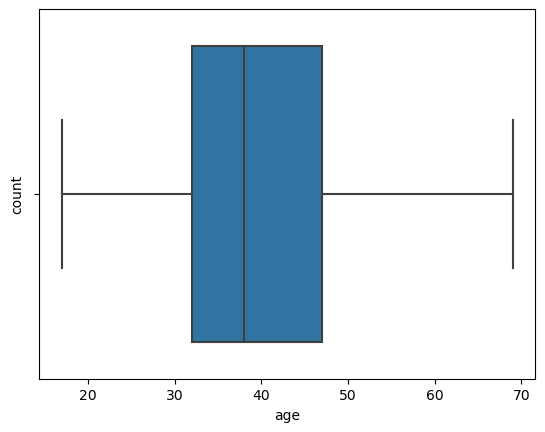

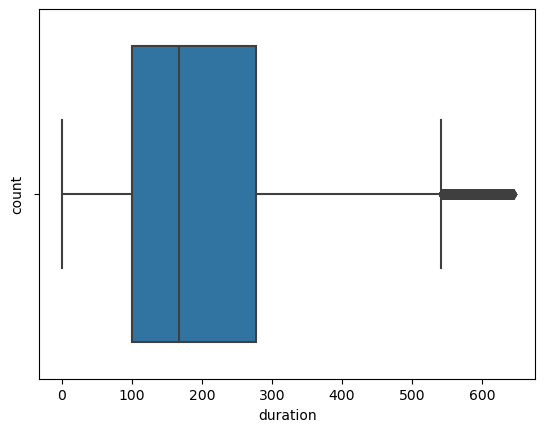

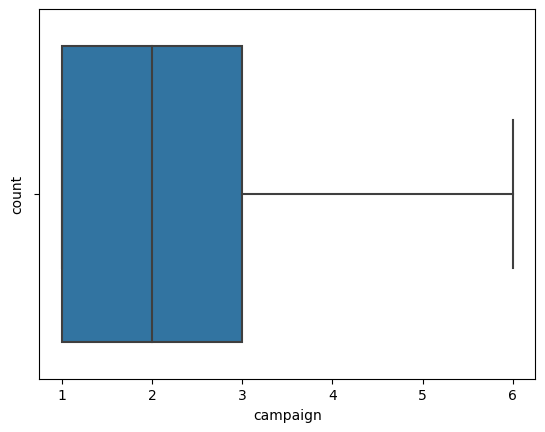

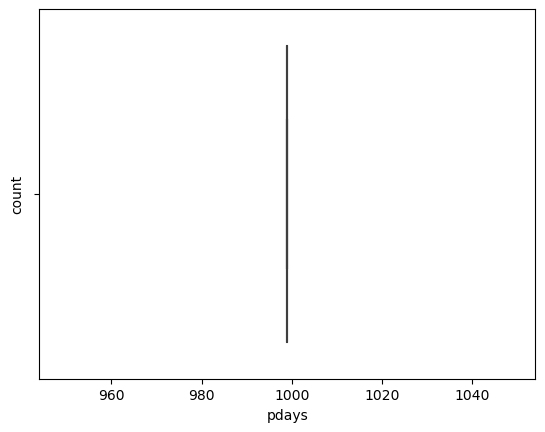

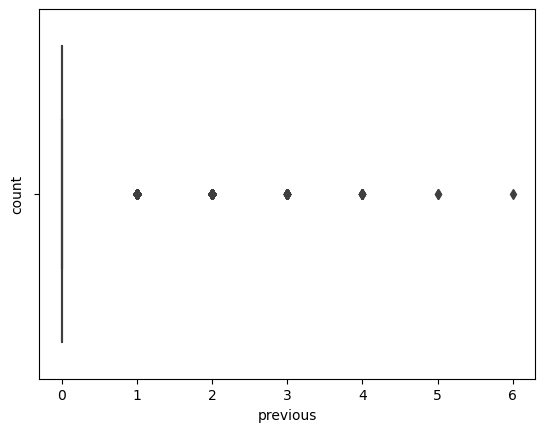

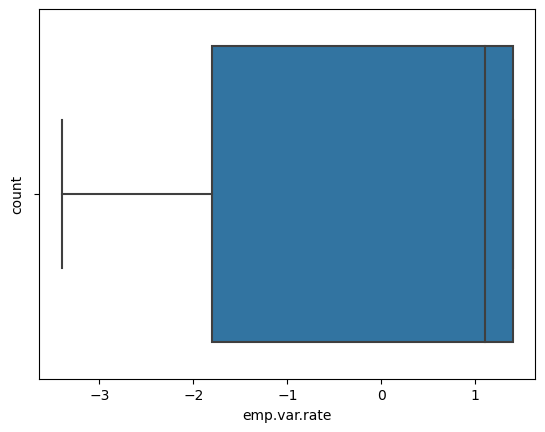

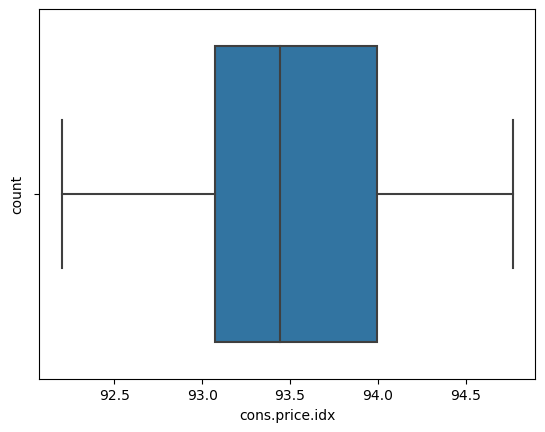

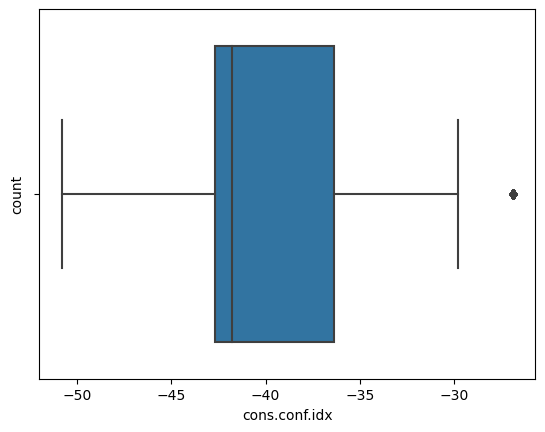

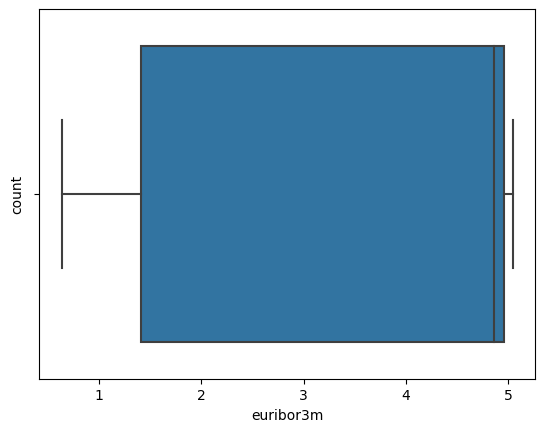

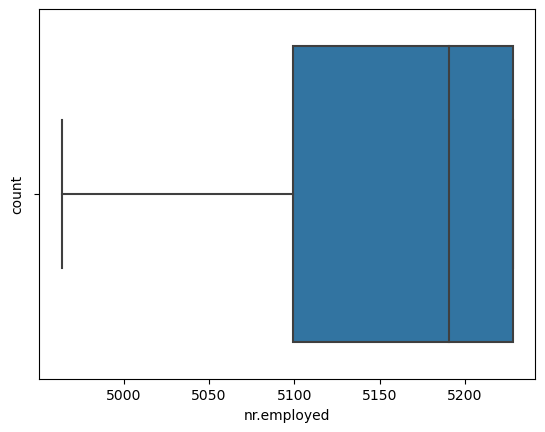

In [66]:
for j in Bank.columns:
    if((Bank[j].dtype == 'int64') or (Bank[j].dtype == 'float64')):
        sns.boxplot(Bank[j])
        plt.ylabel('count')
        plt.xlabel(j)
        plt.show()

In [67]:
Bank.shape

(34267, 21)

In [69]:
# removing duplicates 

Bank = Bank.drop_duplicates()
Bank.shape

(34256, 21)

### Feature Engneering - Encoding

- **One hot encoding** 
-  **Label Encoder**

**Encoding** - This is a method used for changing object datatype cols(features) to numeric as all the calculation can only be performed on the numeric dataset/cols.

What is one hot encoding ?

- Its disadvantage is that it increases the dimensionality. eg for sex col it will create separate male and female cols ( thereby increasing the cols(features) of the dataset  


What is Label encoder ?

- It replaces the categorical data with 0 or 1 depending on their alphabetical order eg - Female - 0 and Male - 1, 2_rs --> 0 and 5_rs --> 1

- we prefer this mainly 

why to use it? 

- 

Advantage?

Disadvantage?

In [70]:
# one hot encoding  -----> pd.get_dummies()


data1 = pd.get_dummies(Bank)

In [71]:
data1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,y_no,y_yes
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,1,0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,1,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,1,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,1,0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,254.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,1,0
41181,37.0,281.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,0,1
41184,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,1,0
41185,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,1,0


In [1]:
# I have to search why 64 cols were reduced to 20 cols (in the dataframe below)

# Answer the cols are now 64 because we have used one hot encoding function.

# It divides cols(features) into separste features based on the uniqueness or variance of the cols. 
# ex - gender col in converted into Male and female cols

# we originally had 21 cols including the target ( but they became 64 by using the one hot encoding method 
# (this is the increase of dimensionality disadvantage, this data1 was a demo))

#### Correlation 

- we can check correaltion by using the function dataframe.corr()

- it will return value between -1 to 1.

- Now, we consider only the values which lay in strong area like near +1 (positively corelated) or -1 (negatively corelated)
  eg: if a cols is 0.8 corelated to target we consider it (here we take 0.5 as a threshold)
        - search for negative example to understand the values for negative correlation( here also we take the same threshold as -0.5)

#### NOTE: 'y' the target col we must only apply remove nulls values here and duplicates no other data pre processing should be applied here (check for this)

In [72]:
Hence we are separating the target col to apply label encoding 

X = Bank.iloc[:,:-1]  # we are extracting columns except last cols

Y = Bank.iloc[:,-1] # we are extracting the last column as here its the target columns

# we can use other methods except this too to extract the target cols from other cols just check.

In [73]:
X



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,admin.,married,university.degree,no,no,no,cellular,nov,fri,254.0,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [74]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41180     no
41181    yes
41184     no
41185     no
41186    yes
Name: y, Length: 34256, dtype: object

#### Label Encoding

In [75]:
#lets convert categorical to numerical columns
#Label encoding

# why do we perform selective importing ?

# --> helps reducing the initial load time significantly.

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for i in X.columns:
    
    if X[i].dtype == 'object':
        
        X[i] = le.fit_transform(X[i])
        print(le.classes_) #just to check the order of the value thats been changed

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent']


In [76]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0


### Feature Selection

`RFE` - Recursive Feature Elimination

What is RFE?

Recursive feature elimination (RFE) is a feature selection technique that fits a model and removes the weakest feature/col (or features/cols) until the specified number of features are reached.( we can specify how many feature we need or the method will take a default value for number of features which will give the best accuracy)

or 

Recursively or repeatedly perform feature elimination technique till the we reach the desired number of features that are best ( the combination is selected by considering all feature then call the model we will be using [ like here logistic regression ] to check for best accuracy and give us back the best performing features list)

when to use it?

Advantage?

Disadvantage?

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [81]:
model = LogisticRegression()

In [83]:
#rfe = RFE (model, n_features_to_select =8)

rfe = RFE(model)

### check above code line again

In [85]:
#fit the rfe model to the data
rfe.fit(X, Y)

RFE(estimator=LogisticRegression())

In [86]:
rfe.support_ # helps us find which cols are selected where true means that col/feature is selected

array([False, False,  True,  True,  True, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False])

In [87]:
selected_indices = [i for i, data in enumerate(rfe.support_) if data == True]
selected_indices

[2, 3, 4, 7, 12, 13, 14, 15, 16, 18]

In [88]:
column_names = X.columns

In [89]:
selected_columns = [column_names[i] for i in selected_indices]

In [90]:
selected_columns

['marital',
 'education',
 'default',
 'contact',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m']

In [91]:
# loc and iloc - used to slice the data
#X = X.loc[10, ['marital']]  --> using col name
#X = X.iloc[10, 3] ---> using col index

In [92]:
X = X.loc[:,['marital',
 'education',
 'default',
 'contact',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m']]

In [93]:
X

,marital,education,default,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m
0,1,0,0,1,999.0,0.0,1,1.1,93.994,4.857
1,1,3,1,1,999.0,0.0,1,1.1,93.994,4.857
2,1,3,0,1,999.0,0.0,1,1.1,93.994,4.857
3,1,1,0,1,999.0,0.0,1,1.1,93.994,4.857
4,1,3,0,1,999.0,0.0,1,1.1,93.994,4.857
...,...,...,...,...,...,...,...,...,...,...
41180,1,6,0,0,999.0,0.0,1,-1.1,94.767,1.028
41181,1,6,0,0,999.0,0.0,1,-1.1,94.767,1.028
41184,1,5,0,0,999.0,0.0,1,-1.1,94.767,1.028
41185,1,6,0,0,999.0,0.0,1,-1.1,94.767,1.028


In [94]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41180     no
41181    yes
41184     no
41185     no
41186    yes
Name: y, Length: 34256, dtype: object

#### If required we can scale the values of the features using the code lines below:

`from sklearn.preprocessing import **StandardScaler**

sc = StandardScaler()

X = sc.fit_transform(X)`

- we check the independent col values to see how the range varies in between them and then decide on standardization 

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.70, random_state = 2)

# use random_state parameter ( we can write any index number here) to store the random value. 
# so, the value doesn't change everytime we execute the code
# train_size you can select from 70 to 85 check the accuracy and you can change them

In [96]:
x_train

,marital,education,default,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m
40292,0,6,0,1,999.0,1.0,0,-1.7,94.215,0.899
636,1,6,0,1,999.0,0.0,1,1.1,93.994,4.857
399,1,2,1,1,999.0,0.0,1,1.1,93.994,4.857
27174,0,6,1,0,999.0,0.0,1,-0.1,93.200,4.021
309,1,0,0,1,999.0,0.0,1,1.1,93.994,4.857
...,...,...,...,...,...,...,...,...,...,...
22074,2,6,0,0,999.0,0.0,1,1.4,93.444,4.964
36127,2,3,0,0,999.0,0.0,1,-1.8,92.893,1.270
35224,1,3,0,0,999.0,1.0,0,-1.8,92.893,1.250
7488,1,5,1,1,999.0,0.0,1,1.1,93.994,4.864


In [97]:
y_train

40292    yes
636       no
399       no
27174     no
309       no
        ... 
22074     no
36127     no
35224     no
7488      no
27648     no
Name: y, Length: 23979, dtype: object

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression()

In [100]:
#model fitting
lr.fit(x_train, y_train)

LogisticRegression()

In [101]:
y_predict = lr.predict(x_test)

In [102]:
y_predict # now we have answers to test with y_test col

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### Accuracy

In [104]:
accuracy_score(y_test, y_predict)

0.9403522428724336

### What is confusion_matrix 


why to use it?

advantages?

Disadvantages?

In [105]:
confusion_matrix(y_test, y_predict) # 0 1 horizontially and 0 1 vertically (rows)

array([[9652,   35],
       [ 578,   12]], dtype=int64)

In [106]:
y_test

4143     no
36574    no
12134    no
8909     no
2098     no
         ..
6774     no
24018    no
10170    no
19441    no
19051    no
Name: y, Length: 10277, dtype: object

In [107]:
x_test

,marital,education,default,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m
4143,1,3,0,1,999.0,0.0,1,1.1,93.994,4.858
36574,1,5,0,0,999.0,1.0,0,-2.9,92.963,1.260
12134,1,1,1,1,999.0,0.0,1,1.4,94.465,4.947
8909,1,3,0,1,999.0,0.0,1,1.4,94.465,4.866
2098,1,3,0,1,999.0,0.0,1,1.1,93.994,4.857
...,...,...,...,...,...,...,...,...,...,...
6774,1,0,1,1,999.0,0.0,1,1.1,93.994,4.857
24018,1,5,0,1,999.0,0.0,1,-0.1,93.798,4.968
10170,1,6,0,1,999.0,0.0,1,1.4,94.465,4.958
19441,1,5,0,0,999.0,0.0,1,1.4,93.444,4.968


In [114]:
lr.predict([[1,3,1,1,901,1,0,2,82,1.232]])

array(['no'], dtype=object)